In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D,Dense, Flatten, Dropout, MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(),y_test.flatten()

print ("Features shape: {}".format(x_train.shape))
print ("Labels shape : {}".format(y_train.shape))

170500096/170498071 [==============================] - 14s 0us/step
Features shape: (50000, 32, 32, 3)
Labels shape : (50000,)


In [3]:
K = len(set(y_train))
print ("Total Classes: {}".format(K))

Total Classes: 10


In [4]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32,(3,3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

In [5]:
model = Model(i,x)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
print (model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928 

In [7]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10)

Epoch 1/10
782/782 [==============================] - 67s 86ms/step - loss: 1.3650 - accuracy: 0.5326 - val_loss: 1.0801 - val_accuracy: 0.6143
Epoch 2/10
782/782 [==============================] - 65s 83ms/step - loss: 0.8665 - accuracy: 0.6976 - val_loss: 0.9626 - val_accuracy: 0.6681
Epoch 3/10
782/782 [==============================] - 65s 83ms/step - loss: 0.7011 - accuracy: 0.7576 - val_loss: 1.2078 - val_accuracy: 0.6119
Epoch 4/10
782/782 [==============================] - 64s 82ms/step - loss: 0.5937 - accuracy: 0.7920 - val_loss: 0.9625 - val_accuracy: 0.6797
Epoch 5/10
782/782 [==============================] - 64s 82ms/step - loss: 0.5117 - accuracy: 0.8210 - val_loss: 0.7241 - val_accuracy: 0.7555
Epoch 6/10
782/782 [==============================] - 64s 82ms/step - loss: 0.4310 - accuracy: 0.8503 - val_loss: 0.7400 - val_accuracy: 0.7543
Epoch 7/10
782/782 [==============================] - 65s 84ms/step - loss: 0.3648 - accuracy: 0.8736 - val_loss: 0.8984 - val_accuracy:

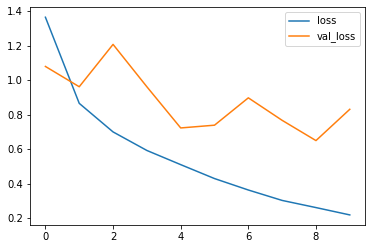

In [8]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

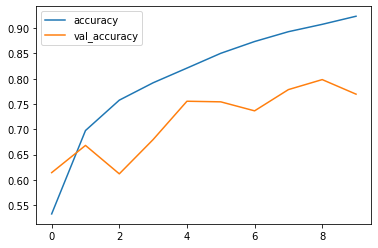

In [11]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [12]:
print (model.evaluate(x_test,y_test))

313/313 [==============================] - 4s 13ms/step - loss: 0.8321 - accuracy: 0.7695
[0.8320617079734802, 0.7695000171661377]


In [13]:
# Plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print ("Normalized Confusion Matrix")
    else:
        print ("Confusion Matrix, without normalization.")
    
    print (cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(
                j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion Matrix, without normalization.
[[886  22  29  12   4   7   2   3  17  18]
 [ 13 935   1   3   1   4   2   2   2  37]
 [ 82  11 691  75  40  60  11  20   2   8]
 [ 40   9  52 643  31 162  25  23   4  11]
 [ 38   9  77  52 709  50  22  39   3   1]
 [ 27   2  30 144  22 735   6  29   1   4]
 [ 14   8  38 101  23  73 731   5   3   4]
 [ 22   5  34  30  30  63   1 809   2   4]
 [138  57  16  20   3   5   3   2 733  23]
 [ 46  93   4  11   1  10   2   6   4 823]]


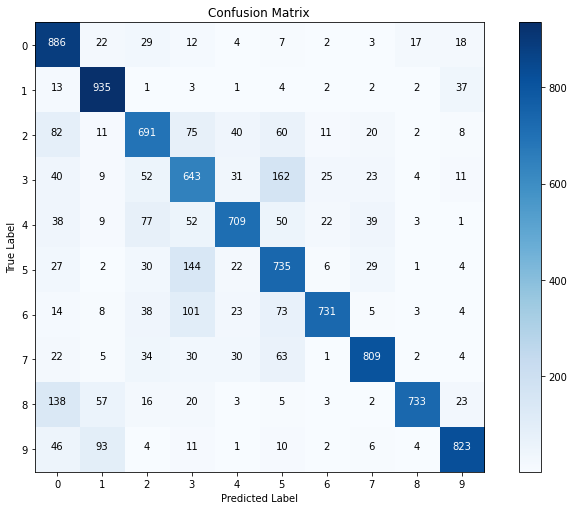

In [14]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)))

Normalized Confusion Matrix
[[0.886 0.022 0.029 0.012 0.004 0.007 0.002 0.003 0.017 0.018]
 [0.013 0.935 0.001 0.003 0.001 0.004 0.002 0.002 0.002 0.037]
 [0.082 0.011 0.691 0.075 0.04  0.06  0.011 0.02  0.002 0.008]
 [0.04  0.009 0.052 0.643 0.031 0.162 0.025 0.023 0.004 0.011]
 [0.038 0.009 0.077 0.052 0.709 0.05  0.022 0.039 0.003 0.001]
 [0.027 0.002 0.03  0.144 0.022 0.735 0.006 0.029 0.001 0.004]
 [0.014 0.008 0.038 0.101 0.023 0.073 0.731 0.005 0.003 0.004]
 [0.022 0.005 0.034 0.03  0.03  0.063 0.001 0.809 0.002 0.004]
 [0.138 0.057 0.016 0.02  0.003 0.005 0.003 0.002 0.733 0.023]
 [0.046 0.093 0.004 0.011 0.001 0.01  0.002 0.006 0.004 0.823]]


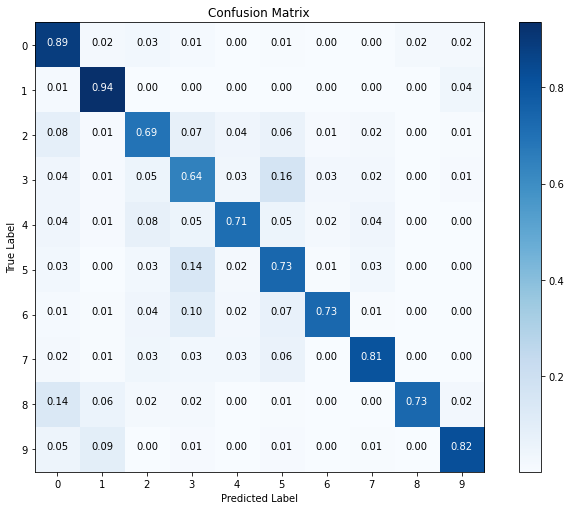

In [15]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)),True)

## Data Generation

In [17]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator,validation_data=(x_test,y_test),epochs=15,steps_per_epoch=steps_per_epoch)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
1562/1562 [==============================] - 81s 52ms/step - loss: 0.8070 - accuracy: 0.7329 - val_loss: 0.8830 - val_accuracy: 0.7033
Epoch 2/15
1562/1562 [==============================] - 81s 52ms/step - loss: 0.6755 - accuracy: 0.7721 - val_loss: 0.6291 - val_accuracy: 0.7877
Epoch 3/15
1562/1562 [==============================] - 81s 52ms/step - loss: 0.6254 - accuracy: 0.7885 - val_loss: 0.6575 - val_accuracy: 0.7832
Epoch 4/15
1562/1562 [==============================] - 80s 51ms/step - loss: 0.5911 - accuracy: 0.7999 - val_loss: 0.6706 - val_accuracy: 0.7733
Epoch 5/15
1562/1562 [==============================] - 80s 51ms/step - loss: 0.5567 - accuracy: 0.8125 - val_loss: 0.7604 - val_accuracy: 0.7419
Epoch 6/15
1562/1562 [==============================] - 80s 51ms/step - loss: 0.5280 - accuracy: 0.8200 - val_loss: 0.5864 - val_accuracy: 0.8014
Epoch 7/15
1562/1562 [==========================

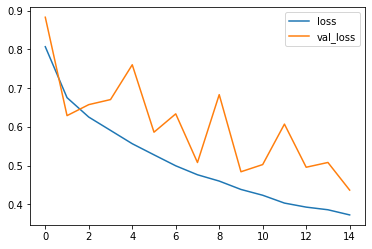

In [18]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

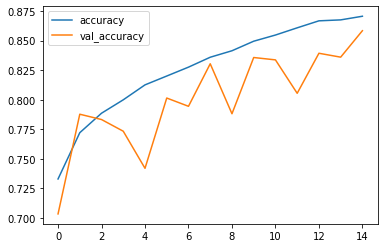

In [19]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [20]:
print (model.evaluate(x_test,y_test))

313/313 [==============================] - 4s 13ms/step - loss: 0.4370 - accuracy: 0.8584
[0.436998188495636, 0.8583999872207642]


In [21]:
# Plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print ("Normalized Confusion Matrix")
    else:
        print ("Confusion Matrix, without normalization.")
    
    print (cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(
                j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion Matrix, without normalization.
[[908  15  26   5   1   0   3   7  14  21]
 [  8 942   2   0   0   0   2   3   3  40]
 [ 31   2 787  22  37  32  57  23   4   5]
 [ 23   3  47 664  35 116  58  40   2  12]
 [ 17   1  30  17 831  15  43  44   1   1]
 [  9   5  23  92  25 782  15  44   0   5]
 [  4   1  16  29   6  10 923   7   1   3]
 [  9   1   7  14  14  14   5 932   2   2]
 [ 57  21   3   4   4   2   3   2 885  19]
 [ 11  40   2   6   0   1   1   5   4 930]]


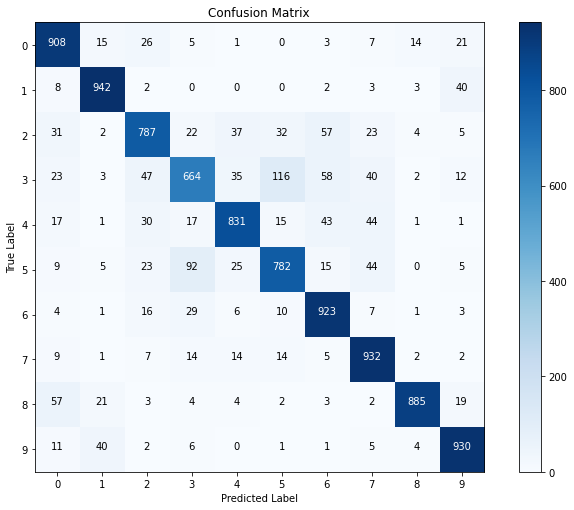

In [22]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)))

Normalized Confusion Matrix
[[0.908 0.015 0.026 0.005 0.001 0.    0.003 0.007 0.014 0.021]
 [0.008 0.942 0.002 0.    0.    0.    0.002 0.003 0.003 0.04 ]
 [0.031 0.002 0.787 0.022 0.037 0.032 0.057 0.023 0.004 0.005]
 [0.023 0.003 0.047 0.664 0.035 0.116 0.058 0.04  0.002 0.012]
 [0.017 0.001 0.03  0.017 0.831 0.015 0.043 0.044 0.001 0.001]
 [0.009 0.005 0.023 0.092 0.025 0.782 0.015 0.044 0.    0.005]
 [0.004 0.001 0.016 0.029 0.006 0.01  0.923 0.007 0.001 0.003]
 [0.009 0.001 0.007 0.014 0.014 0.014 0.005 0.932 0.002 0.002]
 [0.057 0.021 0.003 0.004 0.004 0.002 0.003 0.002 0.885 0.019]
 [0.011 0.04  0.002 0.006 0.    0.001 0.001 0.005 0.004 0.93 ]]


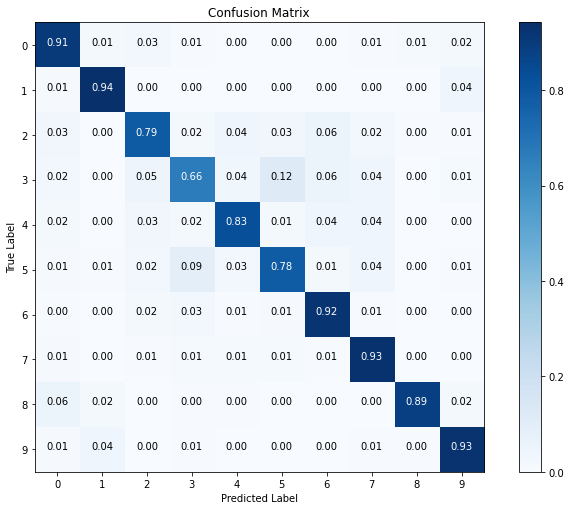

In [23]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)),True)